# Classification Analysis:

## Loading Dataset:

In [1]:
#### importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
import gender_guesser.detector as gender # for categorical variable FIRST_NAME
from sklearn.model_selection import train_test_split # train/test split
from sklearn.metrics import confusion_matrix            # confusion matrix
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.neighbors import KNeighborsClassifier      # KNN for classification
from sklearn.model_selection import RandomizedSearchCV  # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression     # regression model

# setting pandas print options to expand output display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None) # to read entire data dictionary


# specifying file name for dataset
file = '/Users/Alejandra/Desktop/MSBA/Machine Learning/datasets/Apprentice_Chef_Dataset.xlsx'
# specifying file name for variable dictionary
file_dict = '/Users/Alejandra/Desktop/MSBA/Machine Learning/datasets/Apprentice_Chef_Data_Dictionary.xlsx'


# reading the files into Python
app_chef = pd.read_excel(io = file)
app_chef_dict = pd.read_excel(io = file_dict)


# renaming mislabelled variable (discovered during initial dataset exploration)
app_chef.rename(columns = {"LARGEST_ORDER_SIZE" : "AVG_ORDER_SIZE"},
                inplace = True)

# log transforming REVENUE and saving it to the dataset
app_chef['LOG_REVENUE'] = np.log10(app_chef['REVENUE'])

## Feature Engineering:

#### Subsetting 'FIRST_NAME' into Gender with get_gender():

In [2]:
# guessing gender based on (given) name
d = gender.Detector()

app_chef['GENDER'] = app_chef['FIRST_NAME'].map(lambda x: d.get_gender(x))


# checking results
app_chef['GENDER'].value_counts()


# mapping gender to dataframe
app_chef['GENDER'] = app_chef['GENDER'].map({
                      'mostly_female': 'FEMALE', 
                      'mostly_male': 'MALE', 
                      'andy': 'MALE',
                      'female' : 'FEMALE',
                      'male' : 'MALE',
                      'unknown': 'unknown'
})


# making list with unknow gender values
app_chef_unknown = list(app_chef['FIRST_NAME'][app_chef['GENDER'] == 'unknown'])


# creating male and female names lists
male_list = ['Addam','Aegon','Aegor','Aelinor','Aemon','Aggar','Aggo','Alannys',
             'Albett','Alebelly','Arson','Artos','Arwyn','Baelor','Barbrey',
             'Barre','Barristan','Barth','Beck','Beldecar','Bellegere','Beron',
             'Black','Bloodbeard','Bodger','Bonifer','Boros','Bradamar','Brogg',
             'Bronn','Byan','Calon','Canker','Carellen','Cetheres','Chett',
             'Chiswyck','Cleos','Coldhands','Colemon','Corlys','Cortnay',
             'Crawn','Cuger','Dacks','Daemon','Daeron','Dafyn','Dagon','Dake',
             'Danwell','Dickon','Donel','Donnel','Donnor','Dontos','Dornish',
             'Draqaz','Drennan','Duram','Eddard','Edderion','Edmyn','Edric',
             'Edwyn','Eggon','Endrew','Fornio','Fralegg','Frenken','Garizon',
             'Garlan','Garse','Gendel','Gorold','Gran','Grazdan','Grazdar',
             'Greydon','Gulian','Guthor','Gwayne','Gyles','Halmon','Harle',
             'Harren','Harrold','Harwyn','Hoarfrost','Hoke','Hot','Hother',
             'Humfrey','Hunnimore','Irri','Jack-Be-Lucky','Jaremy','Jeor',
             'Jhaqo','Jhiqui','Aerion','Andros','Androw','Arys','Bael','Balman',
             'Balon','Bannen','Belwas','Benjen','Beric','Boremund','Borroq',
             'Bran','Branston','Brown','Brynden','Byam','Byren','Cleyton','Cohollo',
             'Collio','Colmar','Cossomo','Craghas','Cragorn','Cregan','Cutjack',
             'Dagmer','Jonos','Deziel','Doran','Dunaver','Dunsen','Durran','Easy',
             'Edmure','Edwyd','Elys','Eon','Erryk','Esgred','Falyse','Farlen',
             'Ferrego','Flement','Garigus','Godwyn','Gormond','Gurn','Guyard',
             'Gwin','Gylbert','Gynir','Hake','Halder','Haldon','Horas','Halys',
             'Harlon','Harmond','Harmune','Harrag','Harwin','Harwood','Harys',
             'Hayhead','Hazrak','Helliweg','High','Hizdahr','Hobb','Hoster',
             'Howland','Hullen','Hyle','Ilyn','Jaehaerys','Jate','Aemond',
             'Alekyne','All-for-Joffrey','Allaquo','Ambrode','Andar','Antario',
             'Arrec','Arwood','Axell','Azor','Azzak','Baelon','Barthogan','Bayard',
             'Bearded','Benedar','Bennis','Beqqo','Betharios','Bharbo','Big',
             'Blind','Blue','Bluetooth','Briar','Brusco','Bryen','Butterbumps',
             'Cellador','Clubfoot','Clydas','Colen','Coratt','Cotter','Daegon',
             'Dagos','Dancy','Danos','Delonne','Delp','Domeric','Dykk','Ebrose',
             'Eddison','Edrick','Eldiss','Emphyria','Erreck','Erreg','Fogo',
             'Galazza','Galladon','Galyeon','Gawen','Gelmarr','Gendry','Gerardys',
             'Gerren','Gerris','Gevin','Gillam','Gilwood','Gladden','Godric',
             'Godry','Gormon','Gowen','Great','Green','Greenbeard','Grey','Grubbs',
             'Gunthor','Guyne','Gwynesse','Gyleno','Gyloro','Daario','Hallis',
             'Hareth','Harmund','Heward','Horton','Husband','Imry','Jafer',
             'Jeffory','Walys','Jhogo','Jorelle','Joseth','Jyck','Kaeth',
             'Kennos','Kirth','Kojja','Kurz','Lamprey','Lancel','Larence','Leathers',
             'Lem','Lenn','Lewys','Lister','Lomys','Lorent','Lotho','Lucimore',
             'Lucion','Lucos','Lymond','Mace','Mallor','Malwyn','Manfrey','Manfryd',
             'Mathos','Mawney','Medgar','Melwys','Mollos','Moreo','Moryn','Mudge',
             'Murch','Naerys','Narbert','Norjen','Normund','Tybolt','Rodrik',
             'Ollidor','Olyvar','Jonothor','Joth','Karyl','Kedge','Koss','Kraznys',
             'Kromm','Kurleket','Kyleg','Lark','Lenwood','Lenyl','Leobald','Leonette',
             'Loras','Lorcas','Gallard','Lord','Lorren','Luwin','Lythene',
             'Marwyn','Matrice','Mazdhan','Mebble','Meldred','Melly','Merrell',
             'Mezzara','Monterys','Moonshadow','Mord','Morgarth','Morros','Munciter',
             'Mychel','Mallador','Walder','Old','Ollo','Olymer','Jorah','Joyeuse',
             'Ardrian','Kemmett','Kezmya','Khorane','Khrazz','Larys','Lennocks',
             'Lomas','Lothor','Lucamore','Lucifer','Luco','Luthor','Lync','Lysono',
             'Maelor','Mance','Marillion','Marq','Medger','Melicent','Aglantine',
             'Melwyn','Merlon','Merrett','Mikken','Miklaz','Moredo','Moribald',
             'Mullin','Murenmure','Muttering','Mycah','Narbo','Notch','Nymeria',
             'Nymos','Ondrew','Orell','Ormund','Orphan','Orwyle','Orys','Otter',
             'Ottomore','Ottyn','Pate','Patrek','Paxter','Pearse','Plummer',
             'Podrick','Pyat','Pylos','Qarl','Quenton','Quort','Ermesande',
             'Randyll','Rawney','Reznak','Rhaegar','Rhaegel','Rhaego','Rhaella',
             'Roelle','Rolder','Rolfe','Ronnel','Roose','Rugen','Ryam','Rycherd',
             'Ryman','Salladhor','Sallor','Salloreon','Samwell','Sargon','Senelle',
             'Shagga','Shyra','Sour','Squint','Stevron','Stonehand','Sylas',
             'Symond','Syrio','Tarber','Theon','Thormor','Timeon','Timett',
             'Todric','Tommard','TomToo','Torbert','Torrhen','Tregar','Tristifer',
             'Tumberjon','Tya','Tybero','Tyene','Tyland','Tyrek','Tyrion','Tywin',
             'Ulwyck','Vaemond','Valarr','Viserys','Vortimer','Waldon','Wallen',
             'Warryn','Willam','Willum','Wyl','Yellow','Ygon','Oro','Orton',
             'Osbert','Osfryd','Pono','Porridge','Porther','Portifer','Prendahl',
             'Qarlton','Qarro','Quellon','Quhuru','Quickfinger','Rafe','Edgerran',
             'Raymar','Raymun','Redwyn','Regenard','Reysen','Rickon',
             'Robar','Robett','Rolly','Roone','Rylene','Saathos','Sedgekins',
             'Sigrin','Skinner','Styr','Tallad','Tansy','Tanton','Three','Timoth',
             'Tion','Tobbot','Tommen','Tremond','Trystane','Ulrick','Umfred',
             'Urrathon','Urswyck','Urzen','Utherydes','Uthor','Vardis','Vargo',
             'Varly','Vickon','Wayn','Weese','Werlag','Willamen','Willas','Wolmer',
             'Woth','Wynafryd','Xhondo','Orbelo','Osney','Oswell','Oswyn',
             'Othell','Oznak','Parmen','Perriane','Petyr','Praed','Quill','Ragnor',
             'Helman','Maegor','Rat','Reynard','Rhaelle','Romny','Roryn','Runcel',
             'Ryles','Ryon','Sandor','Sarra','Sebaston','Sigfry','Skahaz','Skyte',
             'Spare','Spotted','Stalwart','Steely','Stonesnake','Sybassion',
             'Sybell','Ternesio','Theodan','Theomar','Thoren','Toregg','Trebor',
             'Tumco','Tysane','Tyta','Tytos','Uller','Urreg','Varamyr','Vayon',
             'Shortear','Waltyr','Wat','Whalen','Willifer','Toefinger','Wun',
             'Wylis','Wynafrei','Wynton','Yohn','Yormwell','Zei','Zekko','Zharaq',
             'Zhoe','Abelar','Aethelmure','Alequo','Laenor','Denyo','Alfyn','Anguy',
             'Arneld','Arnell','Arryk','Arthor','Ayrmidon','Ballabar','Bandy',
             'Beardless','Bedwyck','Benfred','Bennard','Bennarion','Biter','Bors',
             'Bump','Buu','Cadwyn','Castos','Cedrik','Cerrick','Cheyk','Chiggen',
             'Clarent','Craster','Cressen','Criston','Dalbridge','Dareon','Squinty',
             'Dhazzar','Dormund','Drogo','Dryn','Dywen','Edwyle','Elder','Elron',
             'Emmon','Emmond','Emrick','Eroeh','Eyron','Ezzelyno','Jothos','Urron',
             'Alyx','Ferret','Galtry','Gascoyne','Ghael','Grenn','Gretchel',
             'Groleo','Gueren','Guncer','Gyldayn','Haggon','Hairy','Harghaz',
              'Harra','Harras','Harrion','Harsley','Hazzea','Helicent','Henly',
             'Hodor','Hop-Robin','Hosman','Hosteen','Hotho','Hubard','Hugor',
             'Illyrio','Ironbelly','Jacks','Jaggot','Jammos','Janos','Jeren',
             'Jodge','Jojen','Jyzene','Kedry','Kenned','Larraq','Left','Lewyn',
             'Lharys','Lucan','Lum','Mad','Maege','Malliard','Mandon','Matarys',
             'Matthar','Matthos','Meizo','Merrit','Monster','Moro','Morrec',
             'Murmison','Nage','Nettles','Nissa','Norne','Norren','Nute','Ocley',
             'Ogo','Orbert','Orivel','Ossifer','Ossy','Othor','Palla','Perwyn',
             'Poetess','Pollitor','Polliver','Poxy','Puckens','Pudding',
             'Puddingfoot','Pycelle','Pyg','Pypar','Qotho','Quaro','Qyburn',
             'Racallio','Ragwyle','Rakharo','Redtusk','Reek','Renfred','Renly',
             'Rhogoro','Ricasso','Rodwell','Roggo','Rollam','Ronel','Ronnet',
             'Rorge','Roro','Rossart','Rudge','Runciter','Ryger','Rymolf',"Sailor's",
             'Sawwood','Scarb','Selmond','Shae','Sherrit','Sigfryd','Skittrick',
             'Squirrel','Stannis','Yoren','Xaro','Endehar','Mushroom','Frenya',
             'Albar','Satin','Errok','Enger','Galbart','Likely','Todder','Haggo',
             'Goady','Grigg','Joramun','Wendello','Forley','Medwick','Steelskin',
             'Stiv','Stygg','Tanselle','Terro','Theomore','Thistle','Hobber',
             'Illifer','Mollander','Lollys','Shagwell','Gared','Karlon','Daven',
             'Rigney','Togg','Tomard','Tormund','Torrek','Torren','Torwynd',
             'Ryk','Malleon','Jorgen','Zollo','Ghost','Frynne','Gorne','Tristimun',
             'Tuffleberry','Turnip','Patchface','Goodwin','Osmynd','Umma','Gerion',
             'Mago','Mero','Watt','Tymor','Chayle','Davos','Bhakaz','Carrot',
             'Tysha','Ulmer','Unella','Urek','Vyman','Tothmure','Turquin','Rast',
             'Jalabhar','Benfrey','Urrigon','Qos','Tygett','Ordello','Qhorin',
             'Mully','Tagganaro','Varys','Mohor','Veiled','Victarion','Vylarr',
             'Wex','Luton','Cadwyl','Utt','Cley','Maric','Perros','Walgrave',
             'Moqorro','Borcas','Jonnel','Harodon','Mirri','Jommy','Kegs','Grisel',
             'Jommo','Monford','Wate','Watty','Luceon','Osha','Sloey','Meribald',
             'Argrave','Lucias','Rafford','Weasel','Tobho','Dyah','Dunstan',
             'Wulfe','Cosgrove','Three-Tooth','Conwy','Hibald','Grunt','Areo',
             'Rhae','Willit','Yandry','Mors','Yorkel']
 
female_list = ['Aemma','Alester','Alicent','Alysanne','Annara','Bass','Berena',
               'Bessa','Brenett','Caleotte','Cyrenna', 'Daella','Daughter','Delena',
               'Doreah','Ebben','Eustace','Falia','Janei','Jaqen','Jeyne','Aladale',
               'Ashara','Belandra','Cassella','Catelyn','Cerenna','Chella',
               'Daena','Daenerys','Yorko','Dorea','Eddara','Elaena','Eleyna',
               'Ellaria','Elyn','Erena','Gariss','Grance','Grisella','Gysella',
               'Helya','Aenys','Aethan','Alliser','Allyria','Baela','Cynthea',
               'Dacey','Donyse','Falena','Jacelyn','Jaehaera','Jyana','Ketter',
               'Lann','Lanna','Lyessa','Maerie','Marghaz','Maslyn','Melara',
               'Mellara','Missandei','Obella','Oberyn','Olene','Jynessa','Laena',
               'Lyanna','Mag','Margaery','Megga','Melesa','Merling','Moelle',
               'Mother','Mysaria','Noho','Nymella','Olenna','Jyanna','Kella',
               'Layna','Loreza','Lucantine','Lynesse','Marsella','Meha','Melessa',
               'Meliana','Bellonara','Meryn','Minisa','Nightingale','Quentyn',
               'Sansa','Sawane','Selyse','Steffon','Sybelle','Valaena','Quenten',
               'Ravella','Sarella','Sarya','Scolera','Sefton','Serala','Serwyn',
               'Steffarion','Talla','Tyana','Qalen','Perra','Qyle','Rennifer',
               'Rhialta','Rosey',"S'vrone",'Saera','Sallei','Shiera','Shierle',
               'Small','Smiling','Sumner','Sylwa','Tanda','Tarle','Wylla',
               'Vaellyn','Visenya','Waymar','Wendamyr','Softfoot','Ygritte','Yna',
               'Zarabelo','Alerie','Agrivane','Carolei','Morra','Alvyn','Alysane',
               'Amarei','Amerei','Arya','Belis','Brea','Brella','Cassana','Cayn',
               'Cedra','Cersei','Chataya','Daeryssa','Darlessa','Daryn','Denestan',
               'Dobber','Donnis','Elyana','Emberlei','Erren','Mellos','Hallyne',
               'Helaena','Jorquen','Joseran','Josmyn','Jurne','Lady','Leslyn',
               'Maegelle','Mela','Melaquin','Meralyn','Merianne','Mordane','Morya',
               'Mylenda','Myrcella','Nolla','Nysterica','Obara','Quaithe','Quent',
               'Rainbow','Rhaena','Rohanne','Ryella','Sharna','Shirei','Myria',
               'Taena','Mellei','Melisandre','Alayaya','Bellena','Victaria',
               'Quence','Larra','Ezzara','Aerys','Rhaenys','Ysilla']
# print(len(male_list))
# print(len(female_list))


# hot coding male and female names into df
placeholder_lst = []

for name in app_chef_unknown:
        if name in male_list:
            placeholder_lst.append('MALE')
        elif name in female_list:
            placeholder_lst.append('FEMALE')
        else:
             print('error')
                
# creating dataframe with first name and gender            
app_chef_unknown = pd.DataFrame({
    'FIRST_NAME': app_chef_unknown,
    'GENDER': placeholder_lst
})


#mapping app_chef_unknown back to dataframe app_chef
m = app_chef.loc[:, 'GENDER'].eq('unknown')
app_chef.loc[:, 'GENDER'] = app_chef.loc[:, 'FIRST_NAME'].map(app_chef_unknown.drop_duplicates()\
                .set_index('FIRST_NAME')['GENDER']).where(m, app_chef['GENDER'])

# one hot encoding
ONE_HOT_GENDER = pd.get_dummies(app_chef.loc[:, 'GENDER'])
app_chef = app_chef.drop('GENDER', axis = 1)
app_chef = app_chef.join(ONE_HOT_GENDER)

#### Checking for correlation in family referrals:

In [3]:
#Creating new feature, Number of names
for index, value in app_chef.iterrows():
    app_chef.loc[index, 'NUMBER_OF_NAMES'] = len(app_chef.loc[index, 'NAME'].split(sep = ' '))

#### Checking for single unique meals purchases:

In [4]:
#Creating new feature SINGLE MEAL to isolate people making a single purchase
app_chef['SINGLE_MEAL'] = 0
app_chef.loc[app_chef['UNIQUE_MEALS_PURCH'] == 1, 'SINGLE_MEAL'] = 1

#### Splitting 'EMAIL' and coding it as a new variable 'EMAIL_DOMAIN':

In [5]:
# creating new column with differen email domains
placeholder_lst = []
    
# iterating through emails and splitting at '@'
for index, col in app_chef.iterrows():
    
    # splitting email domain at '@'
    split_email = app_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAIN']

# concatenating EMAIL_DOMAIN with app_chef DataFrame
app_chef = pd.concat([ app_chef, email_df['EMAIL_DOMAIN'] ],
                   axis = 1)

#printing value counts for EMAIL_DOMAIN
display(app_chef.loc[:, 'EMAIL_DOMAIN'].value_counts())

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
jnj.com              28
cocacola.com         28
merck.com            28
apple.com            27
nike.com             27
ge.org               26
ibm.com              26
dupont.com           26
chevron.com          25
microsoft.com        25
unitedhealth.com     24
travelers.com        24
exxon.com            24
boeing.com           23
pg.com               22
verizon.com          22
caterpillar.com      22
mmm.com              22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
unitedtech.com       18
cisco.com            18
homedepot.com        17
intel.com            17
Name: EMAIL_DOMAIN, dtype: int64

#### Subsetting  'EMAIL_DOMAIN': Creating Dummy for 'PROFESSIONAL_EMAIL', 'PERSONAL_EMAIL' and 'JUNK_EMAIL':

In [6]:
# specifying professional emails and saving them to list
professional_emails = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 
                       'caterpillar.com', 'chevron.com', 'cisco.com', 'cocacola.com',
                       'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 
                       'goldmansacs.com', 'homedepot.com', 'ibm.com', 'intel.com',
                       'jnj.com', 'jpmorgan.com', 'mcdonalds.com', 'merck.com',               
                       'microsoft.com', 'nike.com', 'pfizer.com', 'pg.com',
                       'travelers.com', 'unitedtech.com', 'unitedhealth.com',
                       'verizon.com', 'visa.com', 'walmart.com']

personal_emails    = ['gmail.com', 'yahoo.com', 'protonmail.com']

junk_emails        = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 
                      'msn.com', 'passport.com']


# creating empty dummy variable for professional, personal and junk emails
app_chef.loc[:, 'd_PROFESSIONAL_EMAIL'] = 0
app_chef.loc[:, 'd_PERSONAL_EMAIL'] = 0
app_chef.loc[:, 'd_JUNK_EMAIL'] = 0

# looping over all emails and creating dummy for professional emails
for index, value in app_chef.iterrows():
    
    # filling in dummy variable for professional emails
    if app_chef.loc[index, 'EMAIL_DOMAIN'] in professional_emails:
        app_chef.loc[index, 'd_PROFESSIONAL_EMAIL'] =1
    
    # filling in dummy variable for personal emails
    elif app_chef.loc[index, 'EMAIL_DOMAIN'] in personal_emails:
        app_chef.loc[index, 'd_PERSONAL_EMAIL'] =1
    
    # filling in dummy variable for junk emails
    elif app_chef.loc[index, 'EMAIL_DOMAIN'] in junk_emails:
        app_chef.loc[index, 'd_JUNK_EMAIL'] =1
    
    # controlling for errors
    else:
        print("Something went wrong. Go back and check.")

#### Dropping Irrelevant Variables:

In [7]:
# dropping irrelevant features
app_chef = app_chef.drop(labels = ['NAME', 'FAMILY_NAME', 'FIRST_NAME', 'EMAIL',\
                                  'EMAIL_DOMAIN'],
                         axis   = 1)


# checking results
app_chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'AVG_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'LOG_REVENUE', 'FEMALE', 'MALE', 'NUMBER_OF_NAMES', 'SINGLE_MEAL', 'd_PROFESSIONAL_EMAIL', 'd_PERSONAL_EMAIL', 'd_JUNK_EMAIL'], dtype='object')

#### Combining independent variables into new ones:

In [8]:
# creating a new variable combining CANCELLATIONS_BEFORE_NOON +
# CANCELLATIONS_AFTER_NOON
app_chef['TOTAL_CANCELLATIONS'] = app_chef['CANCELLATIONS_BEFORE_NOON'] + \
                                  app_chef['CANCELLATIONS_AFTER_NOON']


#################################################


# creating a new variable combining CANCELLATIONS_BEFORE_NOON +
# CANCELLATIONS_AFTER_NOON
app_chef['HAS_LOCKER'] = app_chef['PACKAGE_LOCKER'] + \
                                  app_chef['REFRIGERATED_LOCKER']

#### Visualizing Data:

/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/A

/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/Alejandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecat

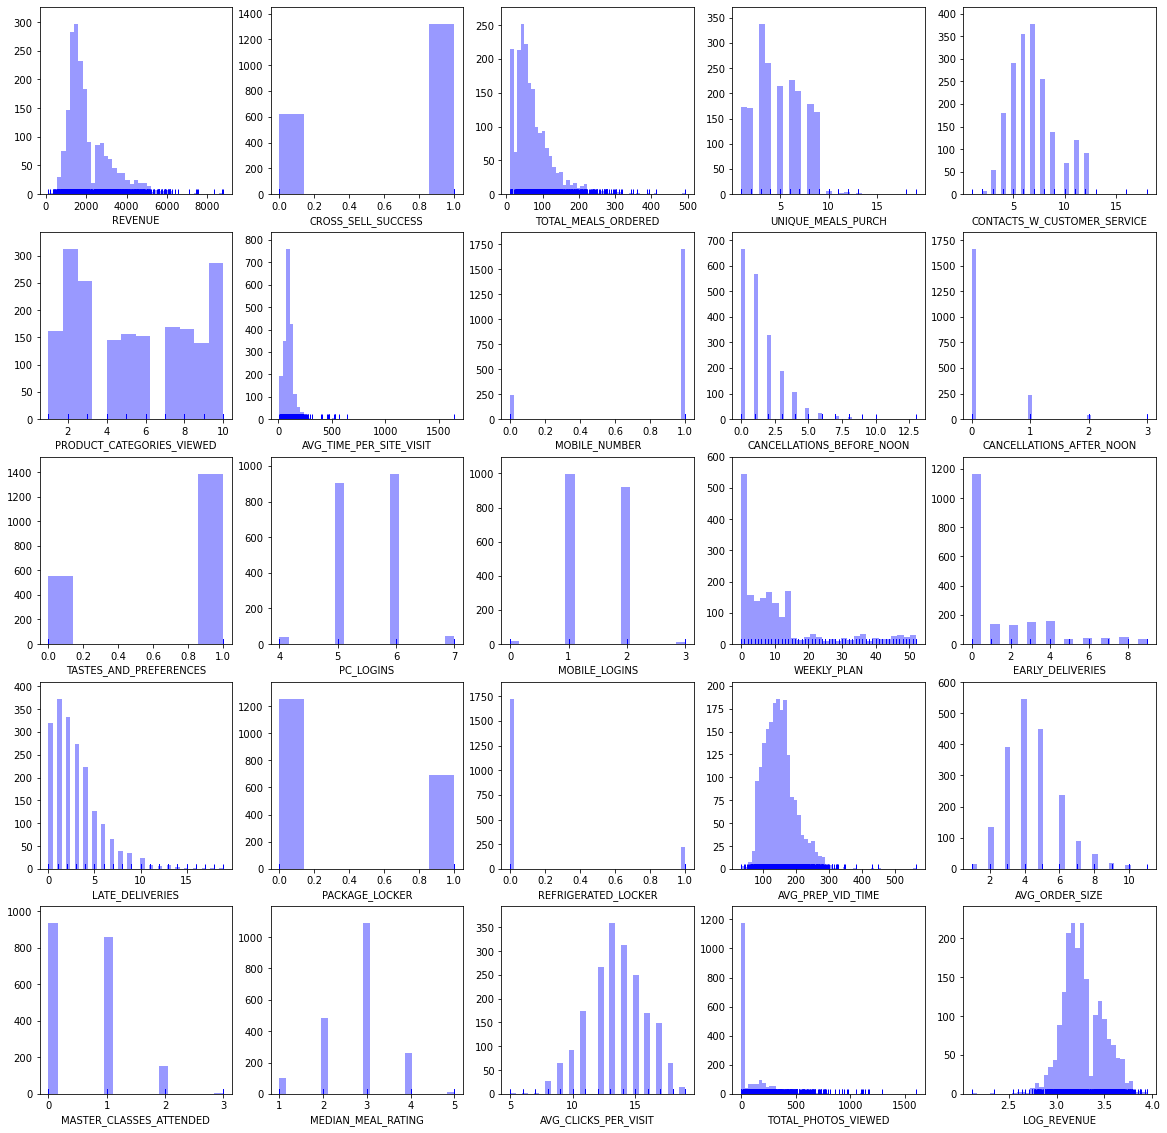

In [9]:
# create a loop to pull histograms to visulaize each numeriable variable 
f, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False)
for ax, feature in zip(axes.flat, app_chef.columns):
    sns.distplot(app_chef[feature], color="blue", kde=False, rug=True, ax=ax)

#### Creating Dummy Variables:

In [10]:
# creating empty lists
app_chef.loc[:, 'd_UNIQUE_MEALS_PURCH']          = 0
app_chef.loc[:, 'd_CONTACTS_W_CUSTOMER_SERVICE'] = 0
app_chef.loc[:, 'd_CANCELLATIONS_BEFORE_NOON']   = 0
app_chef.loc[:, 'd_AVG_ORDER_SIZE']              = 0
app_chef.loc[:, 'd_MASTER_CLASSES_ATTENDED']     = 0
app_chef.loc[:, 'd_MEDIAN_MEAL_RATING']          = 0
app_chef.loc[:, 'd_AVG_CLICKS_PER_VISIT']        = 0
app_chef.loc[:, 'd_TOTAL_PHOTOS_VIEWED']         = 0
app_chef.loc[:, 'd_LATE_DELIVERIES']             = 0
app_chef.loc[:, 'd_EARLY_DELIVERIES']            = 0
app_chef.loc[:, 'd_AVG_PREP_VID_TIME']           = 0
app_chef.loc[:, 'd_AVG_TIME_PER_SITE_VISIT']     = 0
app_chef.loc[:, 'type_EARLY_DELIVERIES']         = 0
app_chef.loc[:, 'type_LATE_DELIVERIES']          = 0


# iterating through each variable above to fill in dummies
for index, value in app_chef.iterrows():
    
    # filling in 'UNIQUE_MEALS_PURCH'
    if app_chef.loc[index, 'UNIQUE_MEALS_PURCH'] < 9:
        app_chef.loc[index, 'd_UNIQUE_MEALS_PURCH'] =1
        
    # filling in 'CONTACTS_W_CUSTOMER_SERVICE'
    if app_chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > 10:
        app_chef.loc[index, 'd_CONTACTS_W_CUSTOMER_SERVICE'] =1 
    
    # filling in 'CANCELLATIONS_BEFORE_NOON'
    if app_chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 6:
        app_chef.loc[index, 'd_CANCELLATIONS_BEFORE_NOON'] =1 
    
    # filling in 'AVG_ORDER_SIZE'
    if app_chef.loc[index, 'AVG_ORDER_SIZE'] > 9:
        app_chef.loc[index, 'd_AVG_ORDER_SIZE'] =1

    # filling in 'MASTER_CLASSES_ATTENDED'
    if app_chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        app_chef.loc[index, 'd_MASTER_CLASSES_ATTENDED'] =1
    
    # filling in 'MEDIAN_MEAL_RATING'
    if app_chef.loc[index, 'MEDIAN_MEAL_RATING'] > 3:
        app_chef.loc[index, 'd_MEDIAN_MEAL_RATING'] =1
    
    # filling in 'AVG_CLICKS_PER_VISIT'
    if app_chef.loc[index, 'AVG_CLICKS_PER_VISIT'] > 11:
        app_chef.loc[index, 'd_AVG_CLICKS_PER_VISIT'] =1
    
    # filling in 'TOTAL_PHOTOS_VIEWED'
    if app_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        app_chef.loc[index, 'd_TOTAL_PHOTOS_VIEWED'] =1
    
    # filling in 'LATE_DELIVERIES'
    if app_chef.loc[index, 'LATE_DELIVERIES'] > 8:
        app_chef.loc[index, 'd_LATE_DELIVERIES'] =1
    
    # filling in 'EARLY_DELIVERIES'
    if app_chef.loc[index, 'EARLY_DELIVERIES'] > 4:
        app_chef.loc[index, 'd_EARLY_DELIVERIES'] = 1
    
    # filling in 'AVG_PREP_VID_TIME'
    if app_chef.loc[index, 'AVG_PREP_VID_TIME'] > 200:
        app_chef.loc[index, 'd_AVG_PREP_VID_TIME'] =1
    
    # filling in 'AVG_TIME_PER_SITE_VISIT'
    if app_chef.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > 200:
        app_chef.loc[index, 'd_AVG_TIME_PER_SITE_VISIT'] =1
    
    # filling in 'type_EARLY_DELIVERIES'
    if app_chef.loc[index, 'EARLY_DELIVERIES'] >= 1:
        app_chef.loc[index, 'type_EARLY_DELIVERIES'] = 1
    
    # filling in 'type_LATE_DELIVERIES'
    if app_chef.loc[index, 'LATE_DELIVERIES'] >= 1:
        app_chef.loc[index, 'type_LATE_DELIVERIES'] = 1
   

#### Creating Variables for Outliers and Trends:

In [11]:
# setting outlier and trend boundaries
# NOTE outL= outliers to the left ("Low"), outH = outliers to the right ("High")
out_AVG_PREP_VID_TIME            = 400
out_AVG_TIME_PER_SITE_VISIT      = 750
out_TOTAL_MEALS_ORDERED          = 250
out_UNIQUE_MEALS_PURCH           = 10
outL_CONTACTS_W_CUSTOMER_SERVICE = 3  
outH_CONTACTS_W_CUSTOMER_SERVICE = 12
out_CANCELLATIONS_BEFORE_NOON    = 9
out_CANCELLATIONS_AFTER_NOON     = 1.5
outH_MOBILE_LOGINS               = 2.5
outL_MOBILE_LOGINS               = 0.5
outH_PC_LOGINS                   = 6.5
outL_PC_LOGINS                   = 4.5
out_LATE_DELIVERIES              = 12
out_AVG_ORDER_SIZE               = 9
out_MASTER_CLASSES_ATTENDED      = 1
outL_AVG_CLICKS_PER_VISIT        = 7
out_TOTAL_PHOTOS_VIEWED         = 470
trend_AVG_PREP_VID_TIME         = 275
trend_AVG_TIME_PER_SITE_VISIT   = 200


# creating empty lists for outlier and trend variables
app_chef['out_AVG_PREP_VID_TIME']           = 0
app_chef['out_AVG_TIME_PER_SITE_VISIT']     = 0
app_chef['out_TOTAL_MEALS_ORDERED']         = 0
app_chef['out_UNIQUE_MEALS_PURCH']          = 0
app_chef['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
app_chef['out_CANCELLATIONS_BEFORE_NOON']   = 0
app_chef['out_CANCELLATIONS_AFTER_NOON']    = 0
app_chef['out_MOBILE_LOGINS']               = 0
app_chef['out_PC_LOGINS']                   = 0
app_chef['out_LATE_DELIVERIES']             = 0
app_chef['out_AVG_ORDER_SIZE']              = 0
app_chef['out_MASTER_CLASSES_ATTENDED']     = 0
app_chef['out_AVG_CLICKS_PER_VISIT']        = 0
app_chef['out_TOTAL_PHOTOS_VIEWED']         = 0
app_chef['trend_AVG_PREP_VID_TIME']         = 0
app_chef['trend_AVG_TIME_PER_SITE_VISIT']   = 0


# iterating through each variable above to fill in dummies
for index, value in app_chef.iterrows():
    
    # filling in 'out_AVG_PREP_VID_TIME'
    if app_chef.loc[index, 'AVG_PREP_VID_TIME'] > out_AVG_PREP_VID_TIME:
        app_chef.loc[index, 'out_AVG_PREP_VID_TIME'] =1
    
    # filling in 'out_AVG_TIME_PER_SITE_VISIT'
    if app_chef.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > out_AVG_TIME_PER_SITE_VISIT:
        app_chef.loc[index, 'out_AVG_TIME_PER_SITE_VISIT'] =1
        
    # filling in 'out_TOTAL_MEALS_ORDERED'
    if app_chef.loc[index, 'TOTAL_MEALS_ORDERED'] > out_TOTAL_MEALS_ORDERED:
        app_chef.loc[index, 'out_TOTAL_MEALS_ORDERED'] =1
    
    # filling in 'out_UNIQUE_MEALS_PURCH'
    if app_chef.loc[index, 'UNIQUE_MEALS_PURCH'] > out_UNIQUE_MEALS_PURCH:
        app_chef.loc[index, 'out_UNIQUE_MEALS_PURCH'] =1
    
    # filling in 'out_CONTACTS_W_CUSTOMER_SERVICE'
    if app_chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] < outL_CONTACTS_W_CUSTOMER_SERVICE:
        app_chef.loc[index, 'out_CONTACTS_W_CUSTOMER_SERVICE'] =1
    elif app_chef.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] > outH_CONTACTS_W_CUSTOMER_SERVICE:
        app_chef.loc[index, 'out_CONTACTS_W_CUSTOMER_SERVICE'] =1
    
    # filling in 'out_CANCELLATIONS_BEFORE_NOON'
    if app_chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > out_CANCELLATIONS_BEFORE_NOON:
        app_chef.loc[index, 'out_CANCELLATIONS_BEFORE_NOON'] =1
    
    # filling in 'out_CANCELLATIONS_AFTER_NOON'
    if app_chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > out_CANCELLATIONS_AFTER_NOON:
        app_chef.loc[index, 'out_CANCELLATIONS_AFTER_NOON'] =1
    
    # filling in 'out_MOBILE_LOGINS'
    if app_chef.loc[index, 'MOBILE_LOGINS'] < outL_MOBILE_LOGINS:
        app_chef.loc[index, 'out_MOBILE_LOGINS'] =1
    elif app_chef.loc[index, 'MOBILE_LOGINS'] > outH_MOBILE_LOGINS:
        app_chef.loc[index, 'out_MOBILE_LOGINS'] =1
    
    # filling in 'out_PC_LOGINS'
    if app_chef.loc[index, 'PC_LOGINS'] < outL_PC_LOGINS:
        app_chef.loc[index, 'out_PC_LOGINS'] =1
    elif app_chef.loc[index, 'PC_LOGINS'] > outH_PC_LOGINS:
        app_chef.loc[index, 'out_PC_LOGINS'] =1
    
    # filling in 'out_LATE_DELIVERIES'
    if app_chef.loc[index, 'LATE_DELIVERIES'] > out_LATE_DELIVERIES:
        app_chef.loc[index, 'out_LATE_DELIVERIES'] =1
        
    # filling in 'out_AVG_ORDER_SIZE'
    if app_chef.loc[index, 'AVG_ORDER_SIZE'] > out_AVG_ORDER_SIZE:
        app_chef.loc[index, 'out_AVG_ORDER_SIZE'] =1   
    
    # filling in 'out_MASTER_CLASSES_ATTENDED'
    if app_chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > out_MASTER_CLASSES_ATTENDED:
        app_chef.loc[index, 'out_MASTER_CLASSES_ATTENDED'] =1   
    
    # filling in 'out_AVG_CLICKS_PER_VISIT'
    if app_chef.loc[index, 'AVG_CLICKS_PER_VISIT'] < outL_AVG_CLICKS_PER_VISIT:
        app_chef.loc[index, 'out_AVG_CLICKS_PER_VISIT'] =1 
        
    # filling in 'out_TOTAL_PHOTOS_VIEWED'
    if app_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > out_TOTAL_PHOTOS_VIEWED:
        app_chef.loc[index, 'out_TOTAL_PHOTOS_VIEWED'] =1 
    
    # filling in 'trend_AVG_PREP_VID_TIME'
    if app_chef.loc[index, 'AVG_PREP_VID_TIME'] > trend_AVG_PREP_VID_TIME:
        app_chef.loc[index, 'trend_AVG_PREP_VID_TIME'] =1
    
    # filling in 'trend_AVG_TIME_PER_SITE_VISIT'
    if app_chef.loc[index, 'AVG_TIME_PER_SITE_VISIT'] > trend_AVG_TIME_PER_SITE_VISIT:
        app_chef.loc[index, 'trend_AVG_TIME_PER_SITE_VISIT'] =1


#### Creating variables for x-inflated features:

In [12]:
# identifying inflations in x-values
inf_TOTAL_MEALS_ORDERED        = 11  
inf_WEEKLY_PLAN                = 0   
inf_TOTAL_PHOTOS_VIEWED        = 0   
inf_CANCELLATIONS_BEFORE_NOON  = 0   
inf_CANCELLATIONS_AFTER_NOON   = 0   
inf_EARLY_DELIVERIES           = 0  
inf_LATE_DELIVERIES            = 0  
inf_MASTER_CLASSES_ATTENDED    = 0   


# creating empty lists for outlier and trend variables
app_chef['inf_TOTAL_MEALS_ORDERED']       = 0
app_chef['inf_WEEKLY_PLAN']               = 0
app_chef['inf_TOTAL_PHOTOS_VIEWED']       = 0
app_chef['inf_CANCELLATIONS_BEFORE_NOON'] = 0
app_chef['inf_CANCELLATIONS_AFTER_NOON']  = 0
app_chef['inf_EARLY_DELIVERIES']          = 0
app_chef['inf_LATE_DELIVERIES']           = 0
app_chef['inf_MASTER_CLASSES_ATTENDED']   = 0


# iterating through each variable above to fill in dummies
for index, value in app_chef.iterrows():
    
    # filling in 'inf_TOTAL_MEALS_ORDERED'
    if app_chef.loc[index, 'TOTAL_MEALS_ORDERED'] == inf_TOTAL_MEALS_ORDERED:
        app_chef.loc[index, 'inf_TOTAL_MEALS_ORDERED'] =1
    
    # filling in 'inf_WEEKLY_PLAN'
    if app_chef.loc[index, 'WEEKLY_PLAN'] == inf_WEEKLY_PLAN:
        app_chef.loc[index, 'inf_WEEKLY_PLAN'] =1
    
    # filling in 'inf_TOTAL_PHOTOS_VIEWED'
    if app_chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] == inf_TOTAL_PHOTOS_VIEWED:
        app_chef.loc[index, 'inf_TOTAL_PHOTOS_VIEWED'] =1
        
    # filling in 'inf_CANCELLATIONS_BEFORE_NOON'
    if app_chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] == inf_CANCELLATIONS_BEFORE_NOON:
        app_chef.loc[index, 'inf_CANCELLATIONS_BEFORE_NOON'] =1
    
    # filling in 'inf_CANCELLATIONS_AFTER_NOON'
    if app_chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] == inf_CANCELLATIONS_AFTER_NOON:
        app_chef.loc[index, 'inf_CANCELLATIONS_AFTER_NOON'] =1
    
    # filling in 'inf_EARLY_DELIVERIES'
    if app_chef.loc[index, 'EARLY_DELIVERIES'] == inf_EARLY_DELIVERIES:
        app_chef.loc[index, 'inf_EARLY_DELIVERIES'] =1
    
    # filling in 'inf_LATE_DELIVERIES'
    if app_chef.loc[index, 'LATE_DELIVERIES'] == inf_LATE_DELIVERIES:
        app_chef.loc[index, 'inf_LATE_DELIVERIES'] =1
    
    # filling in 'inf_MASTER_CLASSES_ATTENDED'
    if app_chef.loc[index, 'MASTER_CLASSES_ATTENDED'] == inf_MASTER_CLASSES_ATTENDED:
        app_chef.loc[index, 'inf_MASTER_CLASSES_ATTENDED'] =1
    

#### Checking that all the columns have been created:

In [13]:
# turning floats into ints
app_chef['REVENUE']                 = app_chef['REVENUE'].astype(int)
app_chef['AVG_TIME_PER_SITE_VISIT'] = app_chef['AVG_TIME_PER_SITE_VISIT'].astype(int)
app_chef['AVG_PREP_VID_TIME']      = app_chef['AVG_PREP_VID_TIME'].astype(int)

# displaying first rows of dataset
display(app_chef.head(n = 5))

# checking results
app_chef.info()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,LOG_REVENUE,FEMALE,MALE,NUMBER_OF_NAMES,SINGLE_MEAL,d_PROFESSIONAL_EMAIL,d_PERSONAL_EMAIL,d_JUNK_EMAIL,TOTAL_CANCELLATIONS,HAS_LOCKER,d_UNIQUE_MEALS_PURCH,d_CONTACTS_W_CUSTOMER_SERVICE,d_CANCELLATIONS_BEFORE_NOON,d_AVG_ORDER_SIZE,d_MASTER_CLASSES_ATTENDED,d_MEDIAN_MEAL_RATING,d_AVG_CLICKS_PER_VISIT,d_TOTAL_PHOTOS_VIEWED,d_LATE_DELIVERIES,d_EARLY_DELIVERIES,d_AVG_PREP_VID_TIME,d_AVG_TIME_PER_SITE_VISIT,type_EARLY_DELIVERIES,type_LATE_DELIVERIES,out_AVG_PREP_VID_TIME,out_AVG_TIME_PER_SITE_VISIT,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_CANCELLATIONS_BEFORE_NOON,out_CANCELLATIONS_AFTER_NOON,out_MOBILE_LOGINS,out_PC_LOGINS,out_LATE_DELIVERIES,out_AVG_ORDER_SIZE,out_MASTER_CLASSES_ATTENDED,out_AVG_CLICKS_PER_VISIT,out_TOTAL_PHOTOS_VIEWED,trend_AVG_PREP_VID_TIME,trend_AVG_TIME_PER_SITE_VISIT,inf_TOTAL_MEALS_ORDERED,inf_WEEKLY_PLAN,inf_TOTAL_PHOTOS_VIEWED,inf_CANCELLATIONS_BEFORE_NOON,inf_CANCELLATIONS_AFTER_NOON,inf_EARLY_DELIVERIES,inf_LATE_DELIVERIES,inf_MASTER_CLASSES_ATTENDED
0,393,1,14,6,12,10,48,1,3,1,1,5,2,0,0,2,0,0,33,1,0,1,17,0,2.594393,0,1,1.0,0,1,0,0,4,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
1,1365,1,87,3,8,8,40,1,0,0,1,5,1,12,0,2,0,0,84,1,0,3,13,170,3.135133,1,0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
2,800,1,15,7,11,5,19,1,3,0,1,6,1,1,0,1,0,0,63,1,0,2,16,0,2.903090,0,1,2.0,0,1,0,0,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,600,1,13,6,11,5,90,1,2,0,1,6,1,14,0,3,0,0,43,1,0,2,14,0,2.778151,1,0,2.0,0,1,0,0,2,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
4,1490,1,47,8,6,10,40,1,0,0,0,5,1,5,0,8,0,0,84,1,1,3,12,205,3.173186,1,0,2.0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REVENUE                          1946 non-null   int64  
 1   CROSS_SELL_SUCCESS               1946 non-null   int64  
 2   TOTAL_MEALS_ORDERED              1946 non-null   int64  
 3   UNIQUE_MEALS_PURCH               1946 non-null   int64  
 4   CONTACTS_W_CUSTOMER_SERVICE      1946 non-null   int64  
 5   PRODUCT_CATEGORIES_VIEWED        1946 non-null   int64  
 6   AVG_TIME_PER_SITE_VISIT          1946 non-null   int64  
 7   MOBILE_NUMBER                    1946 non-null   int64  
 8   CANCELLATIONS_BEFORE_NOON        1946 non-null   int64  
 9   CANCELLATIONS_AFTER_NOON         1946 non-null   int64  
 10  TASTES_AND_PREFERENCES           1946 non-null   int64  
 11  PC_LOGINS                        1946 non-null   int64  
 12  MOBILE_LOGINS       

#### Saving the new cleaned dataset into excel and reloading it as app_chef:

In [14]:
# saving results
app_chef.to_excel('./datasets/Apprentice_Chef_Dataset_clean.xlsx',
                 index = False)

# loading saved file and reinstantiating app_chef
app_chef = pd.read_excel('./datasets/Apprentice_Chef_Dataset_clean.xlsx')

## Model Preparation:

In [15]:
# declaring explanatory variables. RECYCLING app_chef_data
app_chef_data = app_chef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
app_chef_response = app_chef.loc[: , 'CROSS_SELL_SUCCESS']


# train-test split with stratification to avoid category imbalance
X_train, X_test, y_train, y_test= train_test_split(
            app_chef_data,
            app_chef_response,
            test_size    = 0.25,
            random_state = 219,
            stratify     = app_chef_response) # helps prevent response imbalance


# merging training data for statsmodels
app_chef_train = pd.concat([X_train, y_train], axis = 1)

## Model Development and Variable Selection:

In [16]:
# iterating over dataset to print out all independent variable names
for val in app_chef_data:
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 AVG_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 LOG_REVENUE + 
 FEMALE + 
 MALE + 
 NUMBER_OF_NAMES + 
 SINGLE_MEAL + 
 d_PROFESSIONAL_EMAIL + 
 d_PERSONAL_EMAIL + 
 d_JUNK_EMAIL + 
 TOTAL_CANCELLATIONS + 
 HAS_LOCKER + 
 d_UNIQUE_MEALS_PURCH + 
 d_CONTACTS_W_CUSTOMER_SERVICE + 
 d_CANCELLATIONS_BEFORE_NOON + 
 d_AVG_ORDER_SIZE + 
 d_MASTER_CLASSES_ATTENDED + 
 d_MEDIAN_MEAL_RATING + 
 d_AVG_CLICKS_PER_VISIT + 
 d_TOTAL_PHOTOS_VIEWED + 
 d_LATE_DELIVERIES + 
 d_EARLY_DELIVERIES + 
 d_AVG_PREP_VID_TIME + 
 d_AVG_TIME

In [17]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~ MOBILE_NUMBER + 
                                                 TASTES_AND_PREFERENCES + 
                                                 EARLY_DELIVERIES + 
                                                 REFRIGERATED_LOCKER + 
                                                 MALE + 
                                                 NUMBER_OF_NAMES + 
                                                 d_JUNK_EMAIL +
                                                 TOTAL_CANCELLATIONS + 
                                                 type_EARLY_DELIVERIES + 
                                                 trend_AVG_PREP_VID_TIME + 
                                                 inf_CANCELLATIONS_AFTER_NOON + 
                                                 inf_MASTER_CLASSES_ATTENDED
                                                """,
                
                          data    = app_chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
print(results_full.summary())


Optimization terminated successfully.
         Current function value: 0.542630
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1446
Method:                           MLE   Df Model:                           12
Date:                Fri, 05 Feb 2021   Pseudo R-squ.:                  0.1359
Time:                        16:10:50   Log-Likelihood:                -791.70
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.218e-46
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.9367      0.356     -5.440      0.000

#### Instantiating X Variable Sets Based on Significant Combinations:

In [18]:
# FULL model: app_chef_data

'''
# SELECTION_1:
app_chef_SEL_1   =  app_chef_data.loc[:, ['MOBILE_NUMBER', 'TASTES_AND_PREFERENCES',
                                         'PC_LOGINS', 'EARLY_DELIVERIES',
                                         'REFRIGERATED_LOCKER',
                                         'd_PROFESSIONAL_EMAIL', 'TOTAL_CANCELLATIONS',
                                         'trend_AVG_PREP_VID_TIME']]

# SELECTION_2:
app_chef_SEL_2   =  app_chef_data.drop(labels = ['UNIQUE_MEALS_PURCH',
                                                'PRODUCT_CATEGORIES_VIEWED',
                                                'MOBILE_NUMBER',
                                                'CANCELLATIONS_AFTER_NOON',
                                                'TASTES_AND_PREFERENCES',
                                                'PC_LOGINS', 'MOBILE_LOGINS',
                                                'EARLY_DELIVERIES',
                                                'PACKAGE_LOCKER',
                                                'REFRIGERATED_LOCKER',
                                                'MASTER_CLASSES_ATTENDED',
                                                'TOTAL_CANCELLATIONS',
                                                'HAS_LOCKER'],
                                      
                                       axis = 1)

# SELECTION_3:
app_chef_SEL_3   =  app_chef_data.loc[:, ['AVG_TIME_PER_SITE_VISIT', 
                                          'TASTES_AND_PREFERENCES', 'AVG_PREP_VID_TIME', 
                                          'TOTAL_MEALS_ORDERED', 'WEEKLY_PLAN',
                                          'MOBILE_NUMBER', 'REVENUE',
                                          'TOTAL_PHOTOS_VIEWED']]

# SELECTION_4:
app_chef_SEL_4   =  app_chef_data.loc[:, ['REVENUE', 
                                          'MOBILE_NUMBER', 'TASTES_AND_PREFERENCES', 
                                          'PC_LOGINS', 'EARLY_DELIVERIES',
                                          'd_PROFESSIONAL_EMAIL']]


# SELECTION_5:
app_chef_SEL_5   =  app_chef_data.loc[:, ['REVENUE', 
                                          'MOBILE_NUMBER', 'TASTES_AND_PREFERENCES', 
                                          'PC_LOGINS', 'EARLY_DELIVERIES',
                                          'd_PROFESSIONAL_EMAIL']]
'''

# SELECTION_6:
app_chef_SEL_6   =  app_chef_data.drop(labels = ['REVENUE', 'TOTAL_MEALS_ORDERED',
                                                'UNIQUE_MEALS_PURCH',
                                                'CONTACTS_W_CUSTOMER_SERVICE',
                                                'PRODUCT_CATEGORIES_VIEWED',
                                                'AVG_TIME_PER_SITE_VISIT',
                                                'CANCELLATIONS_BEFORE_NOON',
                                                'CANCELLATIONS_AFTER_NOON',
                                                'MOBILE_LOGINS', 'WEEKLY_PLAN',
                                                'LATE_DELIVERIES', 'PACKAGE_LOCKER',
                                                'REFRIGERATED_LOCKER',
                                                'AVG_PREP_VID_TIME', 'AVG_ORDER_SIZE',
                                                'MASTER_CLASSES_ATTENDED',
                                                'MEDIAN_MEAL_RATING',
                                                'AVG_CLICKS_PER_VISIT',
                                                'TOTAL_PHOTOS_VIEWED',
                                                'FEMALE', 'MALE', 'TOTAL_CANCELLATIONS',
                                                'HAS_LOCKER', 'd_UNIQUE_MEALS_PURCH',
                                                'd_CONTACTS_W_CUSTOMER_SERVICE',
                                                'd_CANCELLATIONS_BEFORE_NOON',
                                                'd_AVG_ORDER_SIZE',
                                                'd_MASTER_CLASSES_ATTENDED',
                                                'd_MEDIAN_MEAL_RATING', 
                                                'd_AVG_CLICKS_PER_VISIT',
                                                'd_TOTAL_PHOTOS_VIEWED',
                                                'd_LATE_DELIVERIES',
                                                'out_AVG_PREP_VID_TIME',
                                                'out_AVG_TIME_PER_SITE_VISIT',
                                                'trend_AVG_TIME_PER_SITE_VISIT'],
                                      
                                       axis = 1)


# SELECTION_7:
app_chef_SEL_7   =  app_chef_data.drop(labels = ['d_CONTACTS_W_CUSTOMER_SERVICE',
                                                'd_CANCELLATIONS_BEFORE_NOON',
                                                'd_AVG_ORDER_SIZE',
                                                'd_MASTER_CLASSES_ATTENDED',
                                                'd_MEDIAN_MEAL_RATING', 
                                                'd_AVG_CLICKS_PER_VISIT',
                                                'd_TOTAL_PHOTOS_VIEWED',
                                                'd_LATE_DELIVERIES'],
                                      
                                       axis = 1)

# SELECTION_8:
app_chef_SEL_8   =  app_chef_data.drop(labels = ['out_AVG_TIME_PER_SITE_VISIT',
                                                'REVENUE', 'UNIQUE_MEALS_PURCH',
                                                'AVG_TIME_PER_SITE_VISIT',
                                                'CANCELLATIONS_BEFORE_NOON',
                                                'LATE_DELIVERIES',
                                                'PACKAGE_LOCKER',
                                                'AVG_CLICKS_PER_VISIT',
                                                'TOTAL_PHOTOS_VIEWED',
                                                'FEMALE', 'd_UNIQUE_MEALS_PURCH',
                                                'd_AVG_ORDER_SIZE',
                                                'd_MEDIAN_MEAL_RATING',
                                                'd_TOTAL_PHOTOS_VIEWED',
                                                'd_LATE_DELIVERIES',
                                                'out_AVG_TIME_PER_SITE_VISIT',
                                                'type_EARLY_DELIVERIES',
                                                'type_LATE_DELIVERIES',
                                                'TOTAL_PHOTOS_VIEWED',
                                                'TOTAL_MEALS_ORDERED',
                                                'd_PROFESSIONAL_EMAIL',
                                                'd_CANCELLATIONS_BEFORE_NOON',
                                                'd_AVG_CLICKS_PER_VISIT',
                                                'd_AVG_TIME_PER_SITE_VISIT',
                                                'out_AVG_PREP_VID_TIME'],
                                      
                                       axis = 1)

'''
# SELECTION_9:
app_chef_SEL_9   =  app_chef_data.drop(labels = ['REVENUE', 'TOTAL_MEALS_ORDERED',
                                                'UNIQUE_MEALS_PURCH',
                                                'AVG_TIME_PER_SITE_VISIT',
                                                'MOBILE_NUMBER', 
                                                'CANCELLATIONS_BEFORE_NOON',
                                                'WEEKLY_PLAN', 'LATE_DELIVERIES',
                                                'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER',
                                                'FEMALE', 'd_AVG_ORDER_SIZE',
                                                'd_MEDIAN_MEAL_RATING',
                                                'd_TOTAL_PHOTOS_VIEWED',
                                                'd_LATE_DELIVERIES',
                                                'out_AVG_PREP_VID_TIME',
                                                'out_AVG_TIME_PER_SITE_VISIT',
                                                'trend_AVG_PREP_VID_TIME'],
                                      
                                       axis = 1)
'''

# SELECTION_10:
app_chef_SEL_10 =  app_chef_data.drop(labels = ['inf_MASTER_CLASSES_ATTENDED',
                                               'inf_LATE_DELIVERIES',
                                               'inf_TOTAL_PHOTOS_VIEWED',
                                               'inf_TOTAL_MEALS_ORDERED',
                                               'trend_AVG_TIME_PER_SITE_VISIT',
                                               'out_TOTAL_PHOTOS_VIEWED',
                                               'out_CANCELLATIONS_BEFORE_NOON',
                                               'out_TOTAL_MEALS_ORDERED',
                                               'out_AVG_TIME_PER_SITE_VISIT',
                                               'type_EARLY_DELIVERIES',
                                               'd_LATE_DELIVERIES',
                                               'd_MEDIAN_MEAL_RATING',
                                               'd_AVG_ORDER_SIZE', 
                                               'd_CANCELLATIONS_BEFORE_NOON',
                                               'd_CONTACTS_W_CUSTOMER_SERVICE',
                                               'FEMALE', 'MASTER_CLASSES_ATTENDED',
                                               'PACKAGE_LOCKER', 'TOTAL_MEALS_ORDERED',
                                               'PRODUCT_CATEGORIES_VIEWED',
                                               'EARLY_DELIVERIES',
                                               'out_AVG_CLICKS_PER_VISIT'],
                                      
                                       axis = 1)

# SELECTION_11: From pruned_tree feature significance graph when fitted to X_train, y_train
app_chef_SEL_11 =  app_chef_data.loc[:, ['inf_LATE_DELIVERIES', 'inf_WEEKLY_PLAN',
                                        'out_MASTER_CLASSES_ATTENDED', 'out_PC_LOGINS',
                                        'd_EARLY_DELIVERIES', 'd_UNIQUE_MEALS_PURCH',
                                        'HAS_LOCKER', 'TOTAL_CANCELLATIONS',
                                        'd_JUNK_EMAIL', 'd_PROFESSIONAL_EMAIL',
                                        'SINGLE_MEAL', 'NUMBER_OF_NAMES', 'MALE',
                                        'FEMALE', 'LOG_REVENUE', 
                                        'TOTAL_PHOTOS_VIEWED', 'AVG_CLICKS_PER_VISIT',
                                        'MASTER_CLASSES_ATTENDED', 'AVG_ORDER_SIZE',
                                        'AVG_PREP_VID_TIME', 'REFRIGERATED_LOCKER',
                                        'LATE_DELIVERIES', 'WEEKLY_PLAN', 
                                        'MOBILE_LOGINS', 'PC_LOGINS', 'TASTES_AND_PREFERENCES',
                                        'CANCELLATIONS_AFTER_NOON',
                                        'CANCELLATIONS_BEFORE_NOON', 'MOBILE_NUMBER',
                                        'AVG_TIME_PER_SITE_VISIT',
                                        'PRODUCT_CATEGORIES_VIEWED',
                                        'CONTACTS_W_CUSTOMER_SERVICE', 'UNIQUE_MEALS_PURCH',
                                        'TOTAL_MEALS_ORDERED']]

# SELECTION_12:
app_chef_SEL_12 =  app_chef_data.loc[:, ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                       'CONTACTS_W_CUSTOMER_SERVICE', 
                       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
                       'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 
                       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                       'MOBILE_LOGINS', 'WEEKLY_PLAN', 
                       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER',
                       'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 
                       'AVG_ORDER_SIZE','MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT',
                       'TOTAL_PHOTOS_VIEWED', 'LOG_REVENUE', 'd_JUNK_EMAIL',
                       'd_PROFESSIONAL_EMAIL', 'SINGLE_MEAL', 'out_TOTAL_MEALS_ORDERED', 
                       'out_UNIQUE_MEALS_PURCH', 'out_AVG_TIME_PER_SITE_VISIT',
                       'out_CONTACTS_W_CUSTOMER_SERVICE', 
                       'out_CANCELLATIONS_BEFORE_NOON', 
                       'out_CANCELLATIONS_AFTER_NOON', 'out_MOBILE_LOGINS',
                       'out_PC_LOGINS', 'out_LATE_DELIVERIES', 
                       'out_AVG_PREP_VID_TIME', 'out_AVG_ORDER_SIZE',
                       'out_MASTER_CLASSES_ATTENDED',
                       'out_AVG_CLICKS_PER_VISIT', 'out_TOTAL_PHOTOS_VIEWED', 
                       'inf_TOTAL_MEALS_ORDERED', 'inf_WEEKLY_PLAN',
                       'd_TOTAL_PHOTOS_VIEWED', 'inf_CANCELLATIONS_BEFORE_NOON',
                       'inf_CANCELLATIONS_AFTER_NOON', 'd_EARLY_DELIVERIES',
                       'd_LATE_DELIVERIES', 'd_MASTER_CLASSES_ATTENDED',
                       'TOTAL_MEALS_ORDERED',
                       'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                       'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT',
                       'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 
                       'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN',
                       'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'MASTER_CLASSES_ATTENDED', 
                       'MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT', 
                       'TOTAL_PHOTOS_VIEWED']]

# SELECTION_13:
app_chef_SEL_13 =  app_chef_data.loc[:,['MOBILE_NUMBER', 'TASTES_AND_PREFERENCES', 
                                        'EARLY_DELIVERIES', 'REFRIGERATED_LOCKER', 
                                        'MALE', 'NUMBER_OF_NAMES', 'd_JUNK_EMAIL', 
                                        'TOTAL_CANCELLATIONS', 'type_EARLY_DELIVERIES', 
                                        'trend_AVG_PREP_VID_TIME', 
                                        'inf_CANCELLATIONS_AFTER_NOON', 
                                        'inf_MASTER_CLASSES_ATTENDED']]

#### Creating UDF for LogisticRegression():

In [19]:
def run_logit (dataset = None):

    # train/test split dataset
    X_train, X_test, y_train, y_test = train_test_split(
                dataset,
                app_chef_response,
                random_state = 219,
                test_size    = 0.25,
                stratify     = app_chef_response)


    # INSTANTIATING a logistic regression model
    logreg = LogisticRegression(solver = 'newton-cg',
                                C = 3.9,
                                random_state = 219,
                                warm_start = True)

    # FITTING the training data
    logreg_fit = logreg.fit(X_train, y_train)


    # PREDICTING based on the testing set
    logreg_pred = logreg_fit.predict(X_test)


    # SCORING the results
    print('LogReg Training ACCURACY:', logreg_fit.score(X_train, y_train).round(3))
    print('LogReg Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(3))
    print('LogReg AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(3))

    # saving scoring data for future use
    logreg_train_score = logreg_fit.score(X_train, y_train).round(3) # accuracy
    logreg_test_score  = logreg_fit.score(X_test, y_test).round(3)   # accuracy


    # displaying and saving the gap between training and testing
    print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(3))
    logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(3)


#### Calling UDF on Different Datasets:

In [20]:
print("X_VARIABLES: app_chef_data")
run_logit (dataset = app_chef_data)
# print("\nX_VARIABLES: app_chef_SEL_1")
# run_logit (dataset = app_chef_SEL_1)
# print("\nX_VARIABLES: app_chef_SEL_2")
# run_logit (dataset = app_chef_SEL_2)
# print("\nX_VARIABLES: app_chef_SEL_3")
# run_logit (dataset = app_chef_SEL_3)
# print("\nX_VARIABLES: app_chef_SEL_4")
# run_logit (dataset = app_chef_SEL_4)
# print("\nX_VARIABLES: app_chef_SEL_5")
# run_logit (dataset = app_chef_SEL_5)
print("\nX_VARIABLES: app_chef_SEL_6")
run_logit (dataset = app_chef_SEL_6)
print("\nX_VARIABLES: app_chef_SEL_7")
run_logit (dataset = app_chef_SEL_7)
print("\nX_VARIABLES: app_chef_SEL_8")
run_logit (dataset = app_chef_SEL_8)
# print("\nX_VARIABLES: app_chef_SEL_9")
# run_logit (dataset = app_chef_SEL_9)
print("\nX_VARIABLES: app_chef_SEL_10")
run_logit (dataset = app_chef_SEL_10)
print("\nX_VARIABLES: app_chef_SEL_11")
run_logit (dataset = app_chef_SEL_11)
# print("\nX_VARIABLES: app_chef_SEL_12")
# run_logit (dataset = app_chef_SEL_12)
print("\nX_VARIABLES: app_chef_SEL_13")
run_logit (dataset = app_chef_SEL_13)

X_VARIABLES: app_chef_data
LogReg Training ACCURACY: 0.744
LogReg Testing  ACCURACY: 0.747
LogReg AUC Score        : 0.662
LogReg Train-Test Gap   : 0.003

X_VARIABLES: app_chef_SEL_6
LogReg Training ACCURACY: 0.731
LogReg Testing  ACCURACY: 0.745
LogReg AUC Score        : 0.655
LogReg Train-Test Gap   : 0.014

X_VARIABLES: app_chef_SEL_7
LogReg Training ACCURACY: 0.746
LogReg Testing  ACCURACY: 0.745
LogReg AUC Score        : 0.66
LogReg Train-Test Gap   : 0.001

X_VARIABLES: app_chef_SEL_8
LogReg Training ACCURACY: 0.748
LogReg Testing  ACCURACY: 0.741
LogReg AUC Score        : 0.655
LogReg Train-Test Gap   : 0.007

X_VARIABLES: app_chef_SEL_10
LogReg Training ACCURACY: 0.75
LogReg Testing  ACCURACY: 0.754
LogReg AUC Score        : 0.668
LogReg Train-Test Gap   : 0.004

X_VARIABLES: app_chef_SEL_11
LogReg Training ACCURACY: 0.747
LogReg Testing  ACCURACY: 0.737
LogReg AUC Score        : 0.644
LogReg Train-Test Gap   : 0.01

X_VARIABLES: app_chef_SEL_13
LogReg Training ACCURACY: 0.743

## Hyperparameter Tuning:

#### RandomizedSearchCV for Logit:

In [21]:
'''
# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(app_chef_SEL_13, app_chef_response)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(3))


####### FINAL RESULTS: Printed as notes to shorten processing times #######


# NOTES: Results for app_chef_SEL_13 printed:
# Tuned Parameters  : {'warm_start': False, 'solver': 'sag', 'C': 2.7}
# Tuned CV AUC      : 0.636

'''

'\n# declaring a hyperparameter space\nC_space          = pd.np.arange(0.1, 5.0, 0.1)\nwarm_start_space = [True, False]\nsolver_space     = [\'newton-cg\', \'sag\', \'lbfgs\']\n\n\n# creating a hyperparameter grid\nparam_grid = {\'C\'          : C_space,\n              \'warm_start\' : warm_start_space,\n              \'solver\'     : solver_space}\n\n\n# INSTANTIATING the model object without hyperparameters\nlr_tuned = LogisticRegression(random_state = 219,\n                              max_iter     = 1000)\n\n\n# GridSearchCV object\nlr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object\n                                 param_distributions = param_grid, # parameters to tune\n                                 cv                  = 3,          # how many folds in cross-validation\n                                 n_iter              = 250,        # number of combinations of hyperparameters to try\n                                 random_state        = 2

#### RandomizedSearchCV for CART:

In [22]:
'''
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 1000,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(app_chef_SEL_12, app_chef_response)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(3))


####### FINAL RESULTS: Printed as notes to shorten processing times #######


# NOTES: Results for app_chef_SEL_13 printed:
# Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 21, 'max_depth': 15, 'criterion': 'gini'}
# Tuned Training AUC: 0.625

'''

'\n# declaring a hyperparameter space\ncriterion_space = [\'gini\', \'entropy\']\nsplitter_space  = [\'best\', \'random\']\ndepth_space     = pd.np.arange(1, 25, 1)\nleaf_space      = pd.np.arange(1, 100, 1)\n\n\n# creating a hyperparameter grid\nparam_grid = {\'criterion\'        : criterion_space,\n              \'splitter\'         : splitter_space,\n              \'max_depth\'        : depth_space,\n              \'min_samples_leaf\' : leaf_space}\n\n\n# INSTANTIATING the model object without hyperparameters\ntuned_tree = DecisionTreeClassifier(random_state = 219)\n\n\n# RandomizedSearchCV object\ntuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,\n                                   param_distributions   = param_grid,\n                                   cv                    = 3,\n                                   n_iter                = 1000,\n                                   random_state          = 219,\n                                   scoring = make_sco

#### RandomizedSearchCV for Random Forest:

In [23]:
'''
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
             'min_samples_leaf' : leaf_space,
             'criterion'        : criterion_space,
             'bootstrap'        : bootstrap_space,
             'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                              param_distributions = param_grid,
                              cv         = 3,
                              n_iter     = 1000,
                              scoring    = make_scorer(roc_auc_score,
                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(app_chef_SEL_8, app_chef_response)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(3))


####### FINAL RESULTS: Printed as notes to shorten processing times #######


# NOTES: Results for app_chef_SEL_12 printed:
# Tuned Parameters  : {'warm_start': True, 'n_estimators': 350, 
#                      'min_samples_leaf': 1, 'criterion': 'entropy', 'bootstrap': False}
# Tuned Training AUC: 0.631

'''

'\n# declaring a hyperparameter space\nestimator_space  = pd.np.arange(100, 1100, 250)\nleaf_space       = pd.np.arange(1, 31, 10)\ncriterion_space  = [\'gini\', \'entropy\']\nbootstrap_space  = [True, False]\nwarm_start_space = [True, False]\n\n\n# creating a hyperparameter grid\nparam_grid = {\'n_estimators\'     : estimator_space,\n             \'min_samples_leaf\' : leaf_space,\n             \'criterion\'        : criterion_space,\n             \'bootstrap\'        : bootstrap_space,\n             \'warm_start\'       : warm_start_space}\n\n\n# INSTANTIATING the model object without hyperparameters\nforest_grid = RandomForestClassifier(random_state = 219)\n\n\n# GridSearchCV object\nforest_cv = RandomizedSearchCV(estimator           = forest_grid,\n                              param_distributions = param_grid,\n                              cv         = 3,\n                              n_iter     = 1000,\n                              scoring    = make_scorer(roc_auc_score,\n    

#### GridSearchCV for Gradient Boosted Machines:

In [24]:
'''
# declaring a hyperparameter space
loss_space         = ['deviance', 'exponential']
learn_space        = pd.np.arange(0.1, 2.0, 0.2)
estimator_space    = pd.np.arange(100, 200, 25)
criterion_space    = ['friedman_mse', 'mse', 'mae']
depth_space        = pd.np.arange(1, 8, 1)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'loss'          : loss_space,
              'learning_rate' : learn_space,
              'n_estimators'  : estimator_space,
              'criterion'     : criterion_space,
              'max_depth'     : depth_space,
              'warm_start'    : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 10,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(X_train, y_train)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(3))


# calling best estimator function on model
# full_gbm_cv.best_estimator_


####### FINAL RESULTS: Printed as notes to shorten processing times #######


# NOTES: Results for app_chef_SEL_10 printed:
# Tuned Parameters  : {'warm_start': True, 'n_estimators': 150, 
#                      'max_depth': 2, 'loss': 'deviance', 
#                      'learning_rate': 0, 'criterion': 'mse'}
# Tuned Training AUC: 0.643

'''

'\n# declaring a hyperparameter space\nloss_space         = [\'deviance\', \'exponential\']\nlearn_space        = pd.np.arange(0.1, 2.0, 0.2)\nestimator_space    = pd.np.arange(100, 200, 25)\ncriterion_space    = [\'friedman_mse\', \'mse\', \'mae\']\ndepth_space        = pd.np.arange(1, 8, 1)\nwarm_start_space   = [True, False]\n\n# creating a hyperparameter grid\nparam_grid = {\'loss\'          : loss_space,\n              \'learning_rate\' : learn_space,\n              \'n_estimators\'  : estimator_space,\n              \'criterion\'     : criterion_space,\n              \'max_depth\'     : depth_space,\n              \'warm_start\'    : warm_start_space}\n\n\n# INSTANTIATING the model object without hyperparameters\nfull_gbm_grid = GradientBoostingClassifier(random_state = 219)\n\n\n# GridSearchCV object\nfull_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,\n                           param_distributions = param_grid,\n                           cv                  = 3,\n

#### Train-Test Splitting Data:

In [25]:
# train-test splitting selected data (with stratification)
X_train, X_test, y_train, y_test = train_test_split(
            app_chef_SEL_13,
            app_chef_response,
            test_size    = 0.25,
            random_state = 219,
            stratify     = app_chef_response) # helps prevent response imbalance


## Model Development:
#### Logit Model:
Using the X-variable set that showed the highest correlation:

In [26]:
# INSTANTIATING a logistic regression model with default values
logreg = LogisticRegression(solver = 'sag', # optimized with RandomizedSearchCV
                                C  = 2.7, 
                                warm_start = False, # optimized with RandomizedSearchCV
                                random_state = 219)
# FITTING the training data
logreg_fit = logreg.fit(app_chef_SEL_13, app_chef_response)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(X_train, y_train).round(3))
print('LogReg Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(3))
print('LogReg AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(3))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(X_train, y_train).round(3) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(3)   # accuracy

# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(3))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(3)



#################################################


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 3)


#################################################


# creating a confusion matrix
confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred)

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()

LogReg Training ACCURACY: 0.737
LogReg Testing  ACCURACY: 0.745
LogReg AUC Score        : 0.65
LogReg Train-Test Gap   : 0.008


#### CART Model:

In [27]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8, # set parameters for A1
                                     min_samples_leaf = 21, 
                                     random_state = 219,
                                     splitter = 'best', 
                                     criterion = 'gini') 


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(app_chef_SEL_13, app_chef_response)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(X_test)



# SCORING the model
print('CART Training ACCURACY:', pruned_tree_fit.score(X_train, y_train).round(3))
print('CART Testing  ACCURACY:', pruned_tree_fit.score(X_test, y_test).round(3))
print('CART AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(3))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(X_train, y_train).round(3) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(X_test, y_test).round(3)   # accuracy


# displaying and saving the gap between training and testing
print('CART Train-Test Gap   :', abs(pruned_tree_train_score - \
                                     pruned_tree_test_score).round(3))
pruned_tree_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(3)


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(3) # auc


#################################################


# creating a confusion matrix
confusion_matrix(y_true = y_test,
                       y_pred = pruned_tree_pred)

# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()

CART Training ACCURACY: 0.754
CART Testing  ACCURACY: 0.786
CART AUC Score        : 0.711
CART Train-Test Gap   : 0.032


Checking variable significance:

<ipython-input-28-5a220430c5ef>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


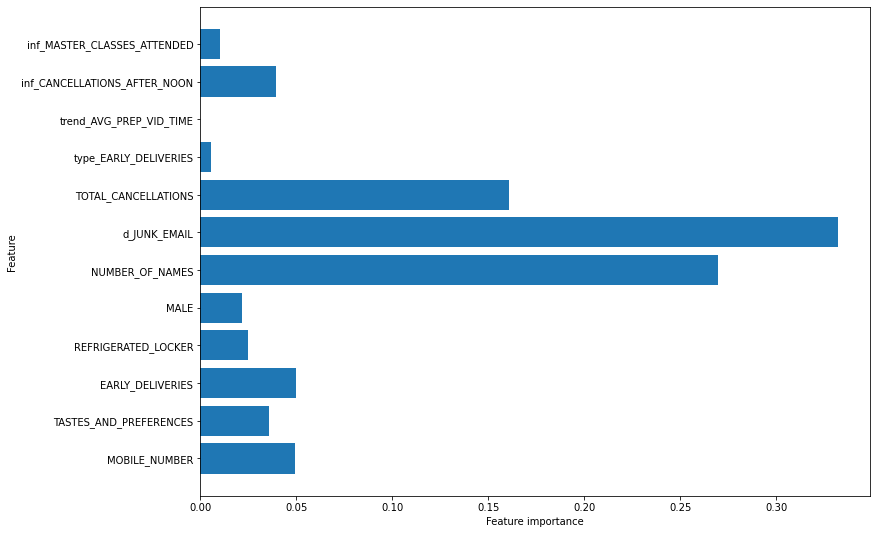

In [28]:
# creating UDF to plot feature importance
def plot_feature_importances(model, train, export = False):
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

# plotting feature importances
plot_feature_importances(pruned_tree_fit,
                         train = X_train,
                         export = False)

#### Random Forest Model:

In [29]:
# INSTANTIATING a random forest object
forest_tuned = RandomForestClassifier(criterion = 'entropy',
                                      min_samples_leaf = 1,
                                      n_estimators = 350,
                                      random_state = 219,
                                      warm_start = True,
                                      bootstrap = False,
                                      max_depth = 8)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(app_chef_SEL_13, app_chef_response)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(X_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(X_train, y_train).round(3))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(X_test, y_test).round(3))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(3))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(X_train, y_train).round(3) # accuracy
forest_tuned_test_score  = forest_tuned.score(X_test, y_test).round(3)   # accuracy


# displaying and saving the gap between training and testing
print('Forest Tuned Train-Test Gap   :', abs(pruned_tree_train_score - \
                                     pruned_tree_test_score).round(3))
pruned_tree_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(3)


# saving the AUC score
forest_tuned_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(3) # auc


#################################################


# creating a confusion matrix
confusion_matrix(y_true = y_test,
                       y_pred = forest_tuned_pred)

# unpacking the confusion matrix
forest_tuned_tn, \
forest_tuned_fp, \
forest_tuned_fn, \
forest_tuned_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()

Forest Tuned Training ACCURACY: 0.809
Forest Tuned Testing  ACCURACY: 0.832
Forest Tuned AUC Score        : 0.764
Forest Tuned Train-Test Gap   : 0.032


#### Gradient Boosted Machines Model

In [30]:
# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(criterion = 'mse', learning_rate = 0.1,
                                       max_depth = 8, n_estimators = 150, 
                                       random_state = 219, warm_start = True, 
                                       loss='deviance')


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(app_chef_SEL_13, app_chef_response)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', gbm_tuned_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(3))


# saving scoring data for future use
gbm_tuned_train_score = gbm_tuned.score(X_train, y_train).round(3) # accuracy
gbm_tuned_test_score  = gbm_tuned.score(X_test, y_test).round(3)   # accuracy


# displaying and saving the gap between training and testing
print('GBM Tuned Train-Test Gap   :', abs(gbm_tuned_train_score - \
                                          gbm_tuned_test_score).round(3))
gbm_test_gap = abs(gbm_tuned_train_score - gbm_tuned_test_score).round(3)


# saving the AUC score
gbm_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = gbm_tuned_pred).round(3) # auc


#################################################


# creating a confusion matrix
confusion_matrix(y_true = y_test,
                       y_pred = gbm_tuned_pred)

# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


Training ACCURACY: 0.877
Testing  ACCURACY: 0.875
AUC Score        : 0.842
GBM Tuned Train-Test Gap   : 0.002


Checking for label leakage:

<ipython-input-28-5a220430c5ef>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


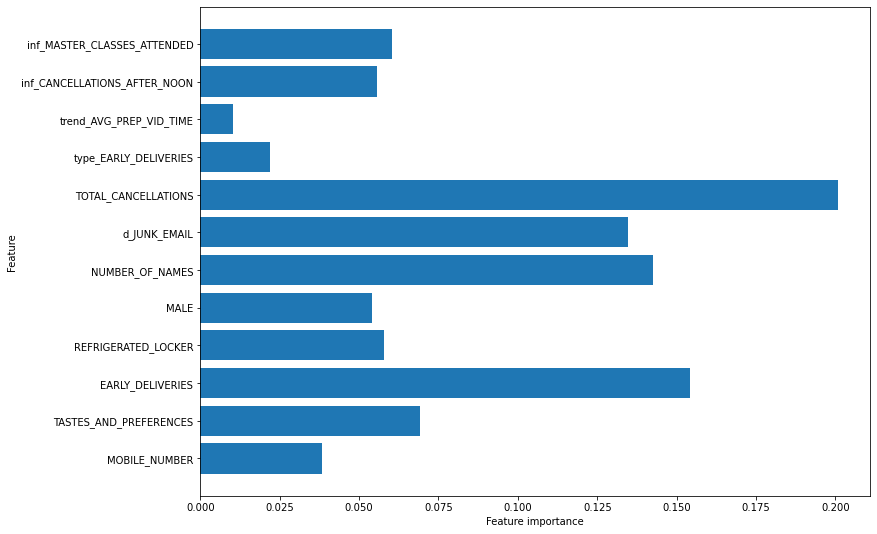

In [31]:
# plotting feature importances
plot_feature_importances(gbm_tuned_fit,
                         train = X_train,
                         export = False)

## Final Model Selection:

In [32]:
# comparing results
print(f"""
Model                   AUC Score      TN, FP, FN, TP
-----                   ---------      --------------
Logistic                {logreg_auc_score}          {logreg_tn, logreg_fp, logreg_fn, logreg_tp} 
Pruned Tree             {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp} 
Random Forest (Tuned)   {forest_tuned_auc_score}         {forest_tuned_tn, forest_tuned_fp, forest_tuned_fn, forest_tuned_tp}
GBM (Tuned)             {gbm_auc_score}         {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp} *FINAL MODEL
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Pruned Tree', 'Random Forest (Tuned)', 'GBM (Tuned)'],
           
    'AUC Score' : [logreg_auc_score, pruned_tree_auc_score, forest_tuned_auc_score, gbm_auc_score],
    
    'Training Accuracy' : [logreg_train_score, pruned_tree_train_score,
                           forest_tuned_train_score, gbm_tuned_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, pruned_tree_test_score,
                           forest_tuned_test_score, gbm_tuned_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (forest_tuned_tn, forest_tuned_fp, forest_tuned_fn, forest_tuned_tp),
                           (gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./model_results/classification_model_performance.xlsx',
                           index = False)
display(model_performance)


Model                   AUC Score      TN, FP, FN, TP
-----                   ---------      --------------
Logistic                0.65          (60, 96, 28, 303) 
Pruned Tree             0.711         (78, 78, 26, 305) 
Random Forest (Tuned)   0.764         (90, 66, 16, 315)
GBM (Tuned)             0.842         (117, 39, 22, 309) *FINAL MODEL



,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.650,0.737,0.745,"(60, 96, 28, 303)"
1,Pruned Tree,0.711,0.754,0.786,"(78, 78, 26, 305)"
2,Random Forest (Tuned),0.764,0.809,0.832,"(90, 66, 16, 315)"
3,GBM (Tuned),0.842,0.877,0.875,"(117, 39, 22, 309)"


## Timing Execution:

In [33]:
import timeit

start = timeit.default_timer()

# All the program statements
stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time)) # It returns time in seconds


Program Executed in 4.328099999995061e-05
